**Análise do Titanic**

Projeto de Ciência de Dados do Kaggle. Temos as informações dos passageiros a bordo: nome, se sobreviveu, classe, gênero, sexo, idade, entre outros. No modelo de Machine Learning abaixo temos uma previsão se os passageiros na base de teste sobreviveram ou não.
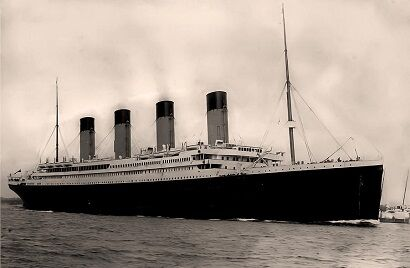

Link: https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv

In [ ]:
!pip install ydata-profiling

In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

In [5]:
# visualizando a base de treino
treino = pd.read_csv('train.csv')
treino.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [6]:
# gerando a visualização com ProfileReport
profile = ProfileReport(treino, title='titanic_treino')
profile.to_file('titanic_treino.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# verificando as informações da base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
treino.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [10]:
# verificando valores nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

**Visualizando a base de teste**

In [11]:
# visualizando a base de teste
teste = pd.read_csv('test.csv')
teste.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [13]:
# analisando os valores nulos
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

Temos colunas que possuem valores vazios na base de teste que não estão vazias na base de treino, nesse caso, precisaríamos tratar essas colunas apenas na base de teste.

- podemos começar tratando os valores vazios

In [15]:
# verificando novamente valores vazios para a base de treino
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [17]:
# verificando quantas linhas e colunas temos na base
treino.shape

(891, 12)

Grande parte das linhas estão vazias, sendo 687 de 891

In [18]:
treino.head(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

Não temos padrão nas colunas "Ticket" e "Cabin", isso não nos ajuda na previsão.

In [19]:
# verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

Colunas com alta cardinalidade como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo pois podem torná-lo menos generalizável. Nesse caso, vamos eliminar essas colunas.

In [20]:
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [21]:
teste = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Tratando a coluna "Age", que possui valores vazios tanto no treino quanto no teste

Como essa coluna possui a idade dos passageiros, podemos utilizar a média das idades para substituir os valores vazios.

In [22]:
# media de idades
treino.Age.mean()

29.69911764705882

In [24]:
# podemos substituir as idades vazias pela média
treino.loc[treino.Age.isnull(), 'Age'] = treino.Age.mean()

In [25]:
teste.loc[teste.Age.isnull(), 'Age'] = teste.Age.mean()

Para a base de treino, ainda temos 2 valores vazios na coluna "Embarked"

Podemos verificar todos os valores nessa coluna e substituir os vazios pela moda

In [27]:
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# Moda da coluna
treino.Embarked.mode()[0]

'S'

In [29]:
# substituindo os valores vazios
treino.loc[treino.Embarked.isnull(), 'Embarked'] = treino.Embarked.mode()[0]

Para a base de teste ainda temos 1 valor vazio em Fare

Podemos utilizar a mesma lógica que fizemos para a coluna Age e substituir pela moda

In [30]:
# verificando a média da coluna Fare para a base de teste
teste.loc[teste.Fare.isnull(), 'Fare'] = teste.Fare.mean()

verificando novamente os valores vazios em "teste" e "treino"

In [32]:
treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [33]:
teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

Considerando apenas as colunas que não são de texto

In [36]:
# verificando as colunas de texto na base de treino
col_treino_nr = treino.columns[treino.dtypes != 'object']
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [37]:
# selecionando apenas os valores numéricos da base de treino
treino_nr = treino.loc[:, col_treino_nr]

Fazendo para a base de teste

In [38]:
col_teste_nr = teste.columns[teste.dtypes != 'object']
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [39]:
teste_nr = teste.loc[:, col_teste_nr]